In [10]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

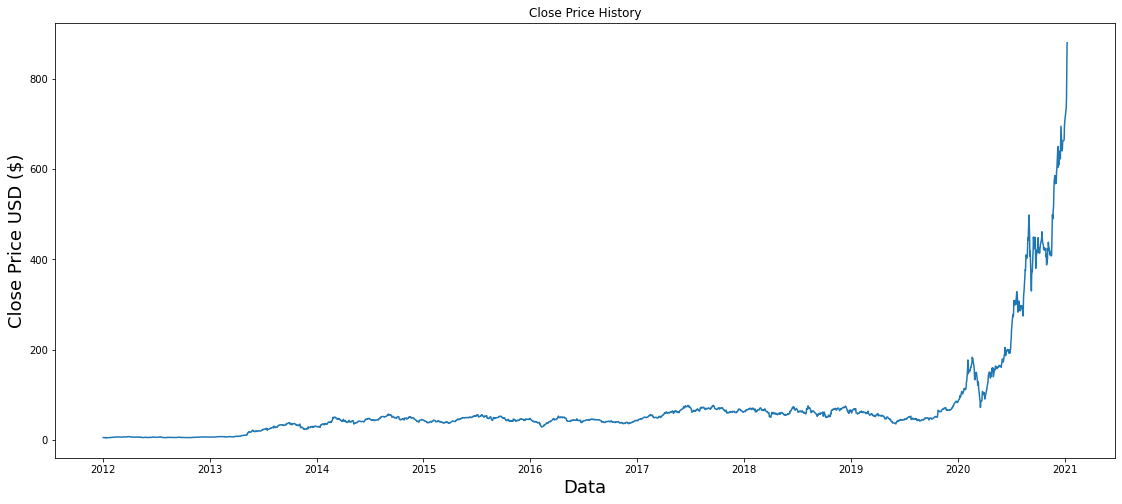

In [47]:
# Get Apple stock data 
# Display Data Plot
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2021-01-08')
plt.figure(figsize=(19,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [48]:
# Create new datafram just with the closing data
data= df.filter(['Close'])
# Convert to a numpy array
dataset = data.values
# Compute optimal number of rows to rain the model on
training_data_len = math.ceil(len(dataset) *.8)

In [49]:
#Scale the data to values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [50]:
# Create the training data
train_data = scaled_data[0:training_data_len, :]

# Split the data in to input and output training sets
x_train=[]
y_train=[]

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [51]:
# Convert the x and y trains to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data to a shape accpected by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

print(x_train.shape)

# Build network with following shape:
# 50 (neurons) input , 25 Dense layer, 1 output neuron
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

(1756, 60, 1)


In [52]:
# Compile the model and set loss function to mean squared error
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the Model (aka squeeky bum bum time)
model.fit(x_train,y_train, batch_size=1, epochs=1)

1756/1756 [==============================] - 111s 61ms/step - loss: 1.1925e-04


In [53]:
# Create test data set
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [54]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [55]:
# Get predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(rmse)

46.708959306306674


<function matplotlib.pyplot.show(close=None, block=None)>

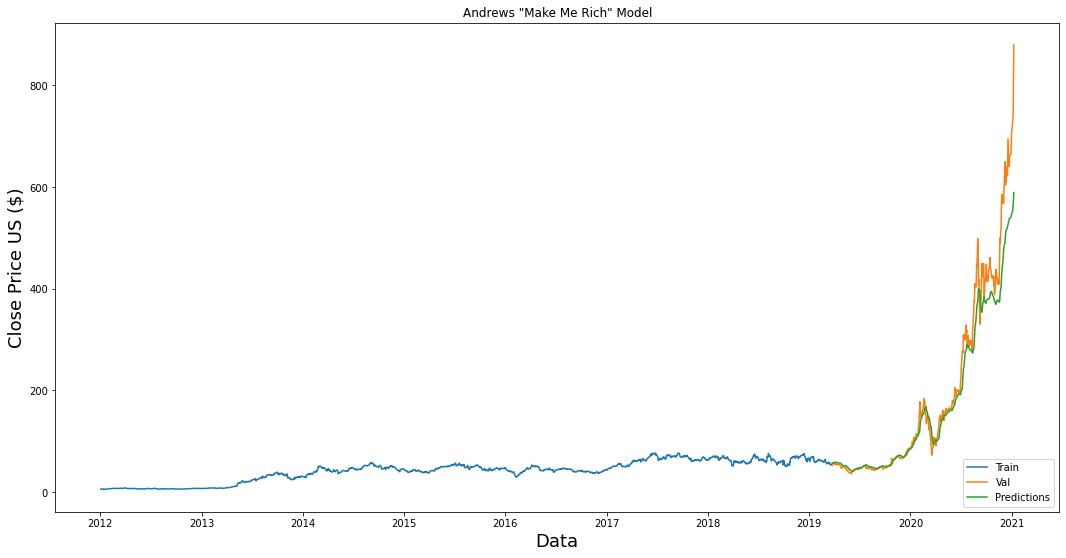

In [56]:
# Plot the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(18,9))
plt.title('Andrews "Make Me Rich" Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price US ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show